In [13]:
#Bibliotecas usadas no projeto
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import ast


In [14]:
url = "https://raw.githubusercontent.com/marceloslo/EnemParser/main/QuestionDistributionGenerator/DISTRIBUTIONS/answer_dist_per_question_TP_COR_RACA.csv"
df = pd.read_csv(url)
df

,CO_ITEM,TP_COR_RACA,TX_GABARITO,answer_distribution,correct_probability
0,5961,0,D,[0.20152103 0.20413623 0.15625094 0.3018607 0...,0.301861
1,5961,1,D,[0.20785183 0.18466386 0.14922391 0.32381313 0...,0.323813
2,5961,2,D,[0.18395694 0.22618259 0.17707904 0.26531855 0...,0.265319
3,5961,3,D,[0.19079357 0.21565166 0.16807732 0.28391885 0...,0.283919
4,5961,4,D,[0.19991014 0.19319873 0.15913622 0.31538008 0...,0.315380
...,...,...,...,...,...
1160,141731,1,E,[0.28928347 0.31609879 0.12660469 0.13956217 0...,0.126314
1161,141731,2,E,[0.25352447 0.37191707 0.10147426 0.14267103 0...,0.127731
1162,141731,3,E,[0.25529817 0.37223063 0.10198091 0.14339402 0...,0.124729
1163,141731,4,E,[0.25880999 0.34535142 0.11731671 0.14213911 0...,0.134473


* Utilizando a métrica NSE, separamos as pessoas que fizeram ENEM em 8 grupos socioeconômicos distintos.
* Calculamos a similaridade entre as distribuições de resposta das LLMs e dos humanos de cada grupo.
* Problemas: análise rasa; as similaridades observadas podem ser uma consequência da probabilidade de acerto dos modelos.

In [15]:
# Mapping for race/ethnicity categories
mapping_cor_raca = {
    0: 'Not Declared',
    1: 'White',
    2: 'Black',
    3: 'Brown',
    4: 'Asian',
    5: 'Indigenous',
    6: 'No information available'
}

# Map the 'Ethnicity' column using the defined mapping
df['TP_COR_RACA'] = df['TP_COR_RACA'].map(mapping_cor_raca)
df.rename(columns={'TP_COR_RACA': 'Ethnicity'}, inplace=True)

In [16]:
# Replace ' ' with ',' and fix the last element in each list
df['answer_distribution'] = df['answer_distribution'].apply(lambda x: ",".join(x.split()).replace(",]", "]"))
unwrapped_df = df['answer_distribution'].apply(lambda x: pd.Series(eval(x)))
df = pd.concat([df, unwrapped_df], axis=1)
unwrapped_df.head()

,0,1,2,3,4,5
0,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
1,0.207852,0.184664,0.149224,0.323813,0.131803,0.002645
2,0.183957,0.226183,0.177079,0.265319,0.144002,0.003461
3,0.190794,0.215652,0.168077,0.283919,0.138655,0.002904
4,0.199910,0.193199,0.159136,0.315380,0.129033,0.003342


In [10]:

# Convert string representations to actual lists
df['answer_distribution'] = df['answer_distribution'].apply(ast.literal_eval)
df['answer_distribution'].head()

0       [0.20152103, 0.20413623, 0.15625094, 0.3018607...
1       [0.20785183, 0.18466386, 0.14922391, 0.3238131...
2       [0.18395694, 0.22618259, 0.17707904, 0.2653185...
3       [0.19079357, 0.21565166, 0.16807732, 0.2839188...
4       [0.19991014, 0.19319873, 0.15913622, 0.3153800...
                              ...                        
1160    [0.28928347, 0.31609879, 0.12660469, 0.1395621...
1161    [0.25352447, 0.37191707, 0.10147426, 0.1426710...
1162    [0.25529817, 0.37223063, 0.10198091, 0.1433940...
1163    [0.25880999, 0.34535142, 0.11731671, 0.1421391...
1164    [0.23061141, 0.40408289, 0.08781288, 0.1433114...
Name: answer_distribution, Length: 1165, dtype: object

In [11]:
# Custom entropy function
def entropy(probabilities, epsilon=1e-10):
    probabilities = np.array(probabilities)
    probabilities = np.clip(probabilities, epsilon, 1 - epsilon)  # Clip probabilities to avoid zeros
    return -np.sum(probabilities * np.log2(probabilities))


# Apply the entropy function to each row of the DataFrame
df['entropy'] = df['answer_distribution'].apply(entropy)

0       2.291116
1       2.265383
2       2.315396
3       2.301118
4       2.278250
          ...   
1160    2.212844
1161    2.170498
1162    2.166467
1163    2.203660
1164    2.141978
Name: entropy, Length: 1165, dtype: float64

In [17]:
items = pd.read_csv("https://raw.githubusercontent.com/marceloslo/EnemParser/main/questao_prova_mapping.csv")
items

KeyboardInterrupt: 

In [ ]:
df = pd.merge(df, items[["CO_ITEM", "SG_AREA","CO_HABILIDADE","IN_ITEM_ABAN","TX_COR"]].drop_duplicates(), on="CO_ITEM", how="left")

,CO_ITEM,Ethnicity,TX_GABARITO,answer_distribution,correct_probability,0,1,2,3,4,5,entropy,SG_AREA,CO_HABILIDADE,IN_ITEM_ABAN,TX_COR
0,5961,Not Declared,D,"[0.20152103, 0.20413623, 0.15625094, 0.3018607...",0.301861,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908,2.291116,MT,7,0,AZUL
1,5961,Not Declared,D,"[0.20152103, 0.20413623, 0.15625094, 0.3018607...",0.301861,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908,2.291116,MT,7,0,AMARELA
2,5961,Not Declared,D,"[0.20152103, 0.20413623, 0.15625094, 0.3018607...",0.301861,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908,2.291116,MT,7,0,ROSA
3,5961,Not Declared,D,"[0.20152103, 0.20413623, 0.15625094, 0.3018607...",0.301861,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908,2.291116,MT,7,0,CINZA
4,5961,Not Declared,D,"[0.20152103, 0.20413623, 0.15625094, 0.3018607...",0.301861,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908,2.291116,MT,7,0,VERDE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6650,141731,Indigenous,E,"[0.23061141, 0.40408289, 0.08781288, 0.1433114...",0.129975,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206,2.141978,CN,29,0,AMARELA
6651,141731,Indigenous,E,"[0.23061141, 0.40408289, 0.08781288, 0.1433114...",0.129975,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206,2.141978,CN,29,0,CINZA
6652,141731,Indigenous,E,"[0.23061141, 0.40408289, 0.08781288, 0.1433114...",0.129975,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206,2.141978,CN,29,0,ROSA
6653,141731,Indigenous,E,"[0.23061141, 0.40408289, 0.08781288, 0.1433114...",0.129975,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206,2.141978,CN,29,0,LARANJA


In [109]:
respostas = list(range(6))

,0,1,2,3,4,5
0,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
1,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
2,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
3,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
4,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
...,...,...,...,...,...,...
6650,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206
6651,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206
6652,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206
6653,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206


In [ ]:
items["TP_LINGUA"] = items["TP_LINGUA"].map({0: 'english', 1: 'spanish', np.nan: 'portuguese'})

In [ ]:
gptMT = pd.read_csv("https://raw.githubusercontent.com/marceloslo/EnemParser/main/GPT/SolvedPortugueseGPT4/solution_enem_22_mt.csv")
gptCH = pd.read_csv("https://raw.githubusercontent.com/marceloslo/EnemParser/main/GPT/SolvedPortugueseGPT4/solution_enem_22_ch.csv")
gptCN = pd.read_csv("https://raw.githubusercontent.com/marceloslo/EnemParser/main/GPT/SolvedPortugueseGPT4/solution_enem_22_cn.csv")
gptLC = pd.read_csv("https://raw.githubusercontent.com/marceloslo/EnemParser/main/GPT/SolvedPortugueseGPT4/solution_enem_22_lc.csv")
gptLC.head(2)

,question,body,A,B,C,D,E,year,question_number,test,answer,language,gpt-4_answer,gpt-4_probs
0,QUESTÃO 01,Descrição da imagem: Tirinha apresentada em qu...,revolta com a falta de sorte.,gosto pela prática da leitura.,receio pelo futuro do casamento.,entusiasmo com os livros de terror.,rejeição ao novo tipo de residência.,2022,1,LC,B,english,B,"{'B': 0.9997995716248057, 'D': 2.8285662100873..."
1,QUESTÃO 02,A Teen’s View of Social Media Instagram is mad...,oferecer recursos de fotografia.,divulgar problemas dos usuários.,estimular aceitação dos seguidores.,provocar ansiedade nos adolescentes.,aproximar pessoas ao redor do mundo.,2022,2,LC,D,english,D,"{'D': 0.9998999808033897, 'B': 1.0798592535453..."


In [113]:
gpt = pd.concat([gptMT, gptCH, gptCN, gptLC], ignore_index=True).sort_values(by='question')[["question_number","test","language","gpt-4_probs","answer"]]
gpt

,question_number,test,language,gpt-4_probs,answer
140,1,LC,spanish,"{'A': 0.9997000567012279, 'E': 3.3255359580266...",A
135,1,LC,english,"{'B': 0.9997995716248057, 'D': 2.8285662100873...",B
136,2,LC,english,"{'D': 0.9998999808033897, 'B': 1.0798592535453...",D
141,2,LC,spanish,"{'A': 0.9996999562911968, 'B': 1.3359866929778...",A
142,3,LC,spanish,"{'D': 0.9998999968803092, 'A': 7.0818900192959...",D
...,...,...,...,...,...
94,95,CN,portuguese,"{'D': 0.9999998096227547, 'A': 1.0907283173840...",D
95,96,CN,portuguese,"{'B': 0.9998687449638521, 'C': 3.0238907245606...",B
96,97,CN,portuguese,"{'E': 0.9997998368503119, 'D': 1.5620827375503...",E
97,98,CN,portuguese,"{'D': 0.6186411498214642, 'B': 0.1828699691023...",A


In [115]:
unwrapped_df = gpt['gpt-4_probs'].apply(lambda x: pd.Series(eval(x)))

# Concatenate the unwrapped columns with the original DataFrame
gpt = pd.concat([gpt, unwrapped_df], axis=1)

In [116]:
questions = ["A","B","C","D","E"]

In [117]:
gpt["NA"] = np.maximum(1 - np.sum(gpt[questions], axis=1), 0)

In [118]:
questions += ['NA']

In [119]:
codes = {'CN':1092,'CH':1062,'LC':1072,'MT':1082}

laranja = items[items["CO_PROVA"].isin(codes.values())].sort_values(by="CO_POSICAO")

In [120]:
merge_df = laranja[["CO_POSICAO","CO_ITEM","SG_AREA","CO_HABILIDADE","TP_LINGUA","IN_ITEM_ABAN"]].drop_duplicates()
gpt = pd.merge(gpt, merge_df, how='left', left_on=['question_number',"language"], right_on=['CO_POSICAO',"TP_LINGUA"])

In [122]:
gpt = gpt[gpt["IN_ITEM_ABAN"] == 0]

In [123]:
questions = ["A","B","C","D","E","NA"]
gpt[questions]

,A,B,C,D,E,NA
0,9.997001e-01,9.997001e-05,9.997001e-05,9.997001e-05,3.325536e-08,1.110223e-16
1,1.855019e-07,9.997996e-01,9.998001e-05,2.828566e-07,9.998001e-05,1.110223e-16
2,9.987065e-09,1.079859e-08,8.409952e-09,9.999000e-01,9.999000e-05,0.000000e+00
3,9.997000e-01,1.335987e-07,9.997004e-05,9.997004e-05,9.997004e-05,0.000000e+00
4,7.081890e-09,9.999000e-05,1.605068e-09,9.999000e-01,4.431734e-09,0.000000e+00
...,...,...,...,...,...,...
180,1.090728e-07,1.499386e-08,4.765039e-08,9.999998e-01,1.866016e-08,2.220446e-16
181,1.002884e-06,9.998687e-01,3.023891e-05,2.285993e-08,9.999039e-05,0.000000e+00
182,4.690228e-08,9.998002e-05,9.998002e-05,1.562083e-07,9.997998e-01,0.000000e+00
183,2.893423e-02,1.828700e-01,3.049646e-03,6.186411e-01,1.665050e-01,0.000000e+00


In [125]:
gpt = gpt[gpt["answer"].isin(questions)]

In [126]:
gpt['correct_probability'] = np.diag(gpt[gpt["answer"]].values)

In [127]:
gpt['entropy'] = gpt[questions].apply(entropy, axis=1)
gpt['entropy'] 

0      0.004419
1      0.002957
2      0.001474
3      0.004421
4      0.001473
         ...   
180    0.000005
181    0.001993
182    0.002950
183    1.480858
184    0.789605
Name: entropy, Length: 177, dtype: float64

In [128]:
df.rename(columns={0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'NA'}, inplace=True)
df[questions]

,A,B,C,D,E,NA
0,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
1,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
2,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
3,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
4,0.201521,0.204136,0.156251,0.301861,0.132323,0.003908
...,...,...,...,...,...,...
6650,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206
6651,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206
6652,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206
6653,0.230611,0.404083,0.087813,0.143311,0.129975,0.004206


In [130]:
from scipy.stats import entropy
from scipy.spatial import distance 
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean,correlation,chebyshev
from scipy.stats import pearsonr



alunos_laranja = df.loc[(df["TX_COR"] == "LARANJA") & (df["IN_ITEM_ABAN"] == 0)]

def calculate_distance(row):
    p = row[questions].values.flatten().astype(np.float64)
    q = gpt.loc[gpt['CO_ITEM'] == row['CO_ITEM'], questions].values.flatten().astype(np.float64)
    return distance.jensenshannon(p, q,base=2) 

alunos_laranja['distance_to_gpt4'] = alunos_laranja.apply(calculate_distance, axis=1)

/tmp/ipykernel_800/564734424.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_laranja['distance_to_gpt4'] = alunos_laranja.apply(calculate_distance, axis=1)


<Axes: xlabel='distance_to_gpt4', ylabel='Count'>

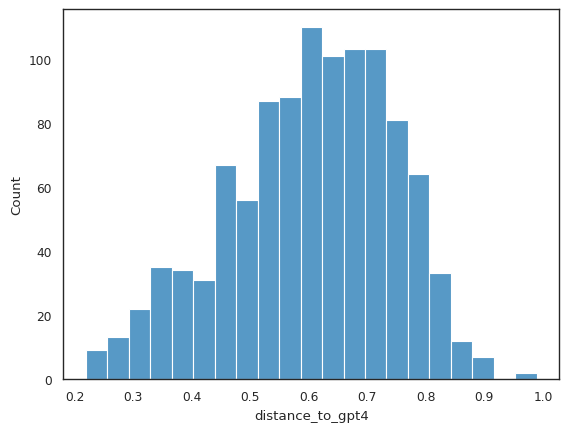

In [131]:
sns.histplot(alunos_laranja['distance_to_gpt4'])

In [137]:
White = alunos_laranja[alunos_laranja["Ethnicity"] == "White"]
Black = alunos_laranja[alunos_laranja["Ethnicity"] == "Black"]

def calculate_distance(row,df):
    p = row[questions].values.flatten().astype(np.float64)
    q = df.loc[df['CO_ITEM'] == row['CO_ITEM'], questions].values.flatten().astype(np.float64)
    return distance.jensenshannon(p, q,base=2)


alunos_laranja['distance_to_White'] = alunos_laranja.apply(lambda x : calculate_distance(x,White), axis=1)
alunos_laranja['distance_to_Black'] = alunos_laranja.apply(lambda x : calculate_distance(x,Black), axis=1)

/tmp/ipykernel_800/4199462872.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_laranja['distance_to_White'] = alunos_laranja.apply(lambda x : calculate_distance(x,White), axis=1)
/tmp/ipykernel_800/4199462872.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alunos_laranja['distance_to_Black'] = alunos_laranja.apply(lambda x : calculate_distance(x,Black), axis=1)


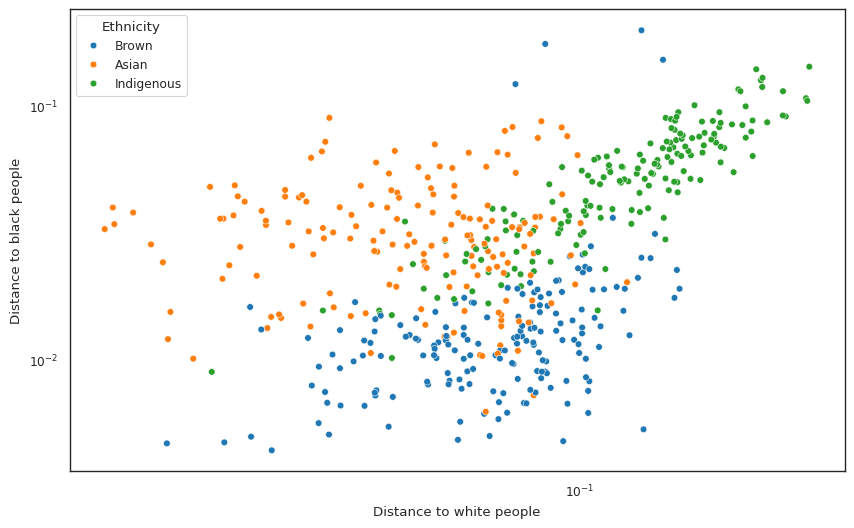

In [142]:
# Create a scatter plot with a logarithmic scale on the y-axis
plt.figure(figsize=(10, 6))

filterr = alunos_laranja[~alunos_laranja["Ethnicity"].isin(["Not Declared","Black","White"])]
filterr = filterr[filterr["distance_to_White"] < 0.3]
sns.scatterplot(data=filterr, x="distance_to_White", y="distance_to_Black", hue="Ethnicity")

# Apply a logarithmic scale to the y-axis
plt.xscale('log')
plt.yscale('log')


plt.xlabel("Distance to white people")
plt.ylabel("Distance to black people")

plt.savefig("images/Distance to White people (x-axis) and Distance to Black people (y-axis) by questions answered by Humans.pdf")
# Show the plot
plt.show()

In [144]:
data = alunos_laranja.groupby("CO_ITEM").agg({
    "distance_to_gpt4": "mean",
    "distance_to_White": "mean",
    "distance_to_Black": "mean",
    "SG_AREA": "first"  # Keep the first value of SG_AREA for each group
}).reset_index()
data

,CO_ITEM,distance_to_gpt4,distance_to_White,distance_to_Black,SG_AREA
0,6864,0.549739,0.051309,0.023491,LC
1,8020,0.763821,0.248710,0.274707,MT
2,9716,0.772099,0.047937,0.028404,LC
3,10322,0.599113,0.095657,0.056951,MT
4,10500,0.311947,0.031610,0.017363,MT
...,...,...,...,...,...
172,141597,0.763003,0.056593,0.032559,CN
173,141712,0.670304,0.067487,0.038320,CN
174,141725,0.671356,0.051422,0.033370,CN
175,141726,0.669125,0.051903,0.030231,CN


In [145]:
White = alunos_laranja[alunos_laranja["Ethnicity"] == "White"]
Black = alunos_laranja[alunos_laranja["Ethnicity"] == "Black"]
    

gpt['distance_to_White'] = gpt.apply(lambda x : calculate_distance(x,White), axis=1)
gpt['distance_to_Black'] = gpt.apply(lambda x : calculate_distance(x,Black), axis=1)

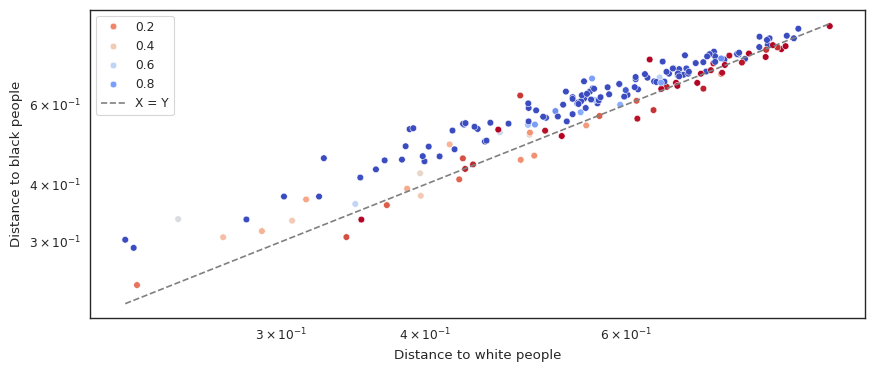

In [146]:
sns.set_style("white")
sns.set_context("paper")
plt.figure(figsize=(10, 4))
sns.scatterplot(data=gpt, x="distance_to_White", y="distance_to_Black", hue="correct_probability", palette="coolwarm_r")
# Draw the line x=y
plt.plot([min(gpt['distance_to_White']), max(gpt['distance_to_White'])], 
         [min(gpt['distance_to_White']), max(gpt['distance_to_White'])], 
         linestyle='--', color='gray',label="X = Y")

plt.legend()
# Show the plot

# filterr = alunos_laranja[~alunos_laranja["Ethnicity"].isin(["Black","White"])]



plt.xlabel("Distance to white people")
plt.ylabel("Distance to black people")

plt.xscale('log')
plt.yscale('log')


plt.savefig("images/Distance to White people distributions (x-axis) and Distance to Black people distributions (y-axis) by questions answered on gpt4.pdf")
plt.show()